[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.

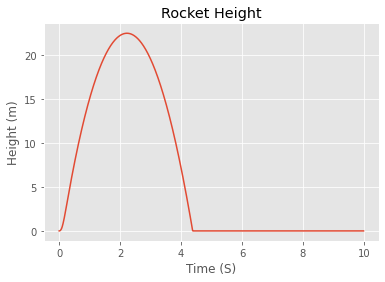

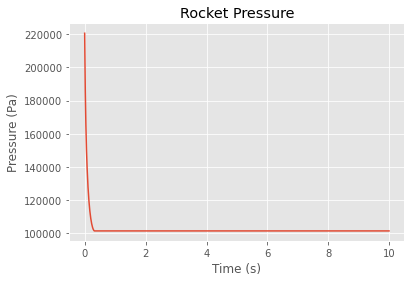

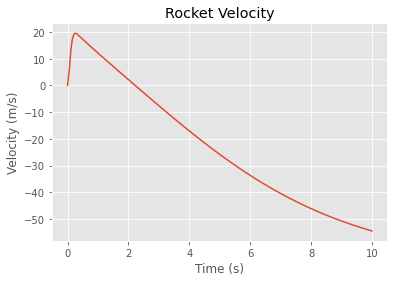

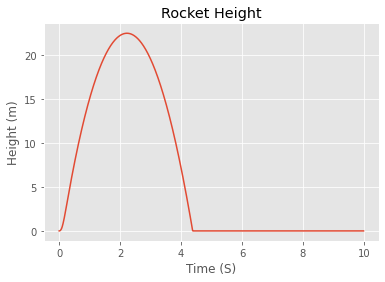

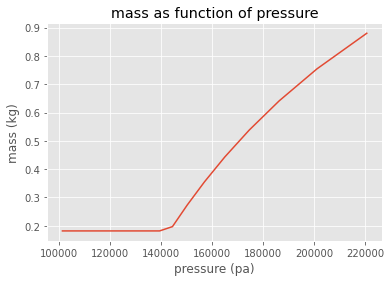

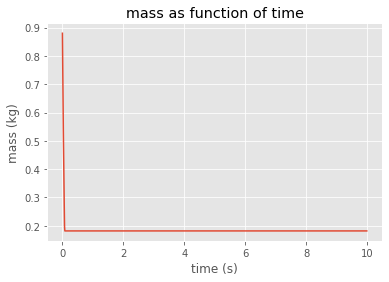

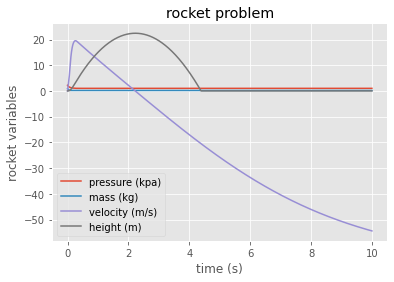

In [1]:
#This program uses Bernoulli's Fluid equation and equations of motion which are combined and solved....
#...numerically using Euler's method via arrays to predict the trajectory of a water rocket

import numpy as np
import matplotlib.pyplot as plt
import scipy

#constants
atm = 101400
litre = 0.001
V0 = 1.3*litre
Pa = 1*atm
rho = 997.0
delt = 0.01
Ae = 0.0004
mr = 0.182
vel = 0
g = 9.81
D = 0.05
Vt = 2*litre

#iteration
num = 1000

#create array
t = np.zeros(num)
P = np.zeros(num)
M = np.zeros(num)
Vel = np.zeros(num)
Y = np.zeros(num)
F = np.zeros(num)
#initial constant values
P[0] = 220608
Vel[0] = vel
t[0] = 0
F[0]=0
#define time - for X axis
def time():
    for i in range(num-1):
        t[i+1] = t[i]+delt
    return list(t)

time = time()
print(time)


#function to compute rocket pressure
def pressure():
    for i in range(num-1):
        P[i+1] = P[i] - (P[i]**2/(P[0]*(Vt-V0)))*Ae*(((2*(P[i]-Pa))/rho)**0.5)*delt
        if P[i+1] <=101401:
            P[i+1] = 101401
    return list(P)

rocket_pressure = pressure()
rocket_pressure_kpa = np.divide(P, 100000)
print(rocket_pressure)
print(rocket_pressure[0])


#function to compute mass of the rocket
def mass():
    for i in range(num):
        M[i] = rho*(Vt - (P[0]*(V0)/rocket_pressure[i])) + mr
        if M[i] <= mr:
            M[i] = mr
    return list(M)                 
    
rocket_mass = mass()
print(rocket_mass)


#function to compute velocity of the rocket
def velocity():
    for i in range(num-1):
        Vel[i+1] = Vel[i] + (((2*Ae*(rocket_pressure[i]-101400)-0.0004*Vel[i]*abs(Vel[i]))/(rocket_mass[i]))-g)*delt
    return list(Vel)

rocket_velocity = velocity()
print(rocket_velocity)



#function to compute height of the rocket
def height():
    for i in range(num-1):
        Y[i+1] = Y[i] + rocket_velocity[i]*delt   
        if Y[i+1]<=0:
            Y[i+1]=0
    return list(Y)

rocket_height = height()
print(rocket_height) 
   

#print(plt.style.available)
plt.style.use('ggplot')

#rocket height plot
plt.plot(time,rocket_height)
plt.title("Rocket Height")
plt.xlabel("Time (S)")
plt.ylabel("Height (m)")
plt.savefig('rocket_height.png',bbox_inches='tight',dpi=200)
plt.show()
    
#rocket pressure plot
plt.plot(time,rocket_pressure)
plt.title("Rocket Pressure")
plt.xlabel("Time (s)")
plt.ylabel("Pressure (Pa)")
plt.savefig('rocket_pressure.png',bbox_inches='tight',dpi=200)
plt.show()

#rocket velocity plot
plt.plot(time,rocket_velocity)
plt.title("Rocket Velocity")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")
plt.savefig('rocket_velocity.png',bbox_inches='tight',dpi=200)
plt.show()


#rocket height plot
plt.plot(time,rocket_height)
plt.title("Rocket Height")
plt.xlabel("Time (S)")
plt.ylabel("Height (m)")
plt.savefig('rocket_height.png',bbox_inches='tight',dpi=200)
plt.show()

#mass as function of pressure
plt.plot(rocket_pressure,rocket_mass)
plt.title("mass as function of pressure")
plt.xlabel("pressure (pa)")
plt.ylabel("mass (kg)")
plt.savefig('rocket_mass(pressure).png',bbox_inches='tight',dpi=200)
plt.show()

#mass as function of pressure
plt.plot(time,rocket_mass)
plt.title("mass as function of time")
plt.xlabel("time (s)")
plt.ylabel("mass (kg)")
plt.savefig('rocket_mass(time).png',bbox_inches='tight',dpi=200)
plt.show()

#all in one plot
plt.plot(time, rocket_pressure_kpa, label='pressure (kpa)')
plt.plot(time, rocket_mass, label='mass (kg)')
plt.plot(time, rocket_velocity, label='velocity (m/s)')
plt.plot(time, rocket_height, label='height (m)')
plt.title("rocket problem")
plt.xlabel("time (s)")
plt.ylabel("rocket variables")
plt.legend()
plt.savefig('rocket.png',bbox_inches='tight',dpi=200)
plt.show()


